In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/breastcancerData.csv')

In [ ]:
df


842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119  \
0    0.07017  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660  0.2416   
1    0.12790  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450  0.4504   
2    0.10520  ...  14.910  26.50   98.87   567.7  0.20980  0.86630  0.6869   
3    0.10430  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500  0.4000   
4    0.08089  ...  15.470  23.75  103.40   741.6  0.17910  0.52490  0.5355   
..       ...  ...     ...    ...     ...     ...      ...      ...     ...   
563  0.13890  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130  0.4107   
564  0.09791  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220  0.3215   
565  0.05302  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940  0.3403   
566  0.15200  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810  0.9387   
567  0.00000  ...   9.456  30.37   59.16   268.6  0.08996  0.06444  0.0000   

     0.2654  0.4601   0.1189  
0    0.1860  0.2750  0.08902  
1    0.2430  0.3613  0.08758  
2    0.2575  0.6638  0.17300  
3    0.1625  0.2364  0.07678  
4    0.1741  0.3985  0.12440  
..      ...     ...      ...  
563  0.2216  0.2060  0.07115  
564  0.1628  0.2572  0.06637  
565  0.1418  0.2218  0.07820  
566  0.2650  0.4087  0.12400  
567  0.0000  0.2871  0.07039  

[568 rows x 32 columns]

In [ ]:
datafile = '/content/breastcancerData.csv'
headerfile = '/content/Headers.csv'

headers = pd.read_csv(headerfile, header=None)
headers = headers.squeeze().tolist()

df = pd.read_csv(datafile, header=None, names=headers)

In [ ]:
df.head()

ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  texture3  perimeter3  \
0       0.27760      0.3001          0.14710  ...     17.33      184.60   
1       0.07864      0.0869          0.07017  ...     23.41      158.80   
2       0.15990      0.1974          0.12790  ...     25.53      152.50   
3       0.28390      0.2414          0.10520  ...     26.50       98.87   
4       0.13280      0.1980          0.10430  ...     16.67      152.20   

    area3  smoothness3  compactness3  concavity3  concave_points3  symmetry3  \
0  2019.0       0.1622        0.6656      0.7119           0.2654     0.4601   
1  1956.0       0.1238        0.1866      0.2416           0.1860     0.2750   
2  1709.0       0.1444        0.4245      0.4504           0.2430     0.3613   
3   567.7       0.2098        0.8663      0.6869           0.2575     0.6638   
4  1575.0       0.1374        0.2050      0.4000           0.1625     0.2364   

   fractal_dimension3  Unnamed : 32  
0             0.11890           NaN  
1             0.08902           NaN  
2             0.08758           NaN  
3             0.17300           NaN  
4             0.07678           NaN  

[5 rows x 33 columns]

In [ ]:
df.tail()

ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
564  926424         M    21.56     22.39      142.00  1479.0      0.11100   
565  926682         M    20.13     28.25      131.20  1261.0      0.09780   
566  926954         M    16.60     28.08      108.30   858.1      0.08455   
567  927241         M    20.60     29.33      140.10  1265.0      0.11780   
568   92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  ...  texture3  perimeter3  \
564       0.11590     0.24390          0.13890  ...     26.40      166.10   
565       0.10340     0.14400          0.09791  ...     38.25      155.00   
566       0.10230     0.09251          0.05302  ...     34.12      126.70   
567       0.27700     0.35140          0.15200  ...     39.42      184.60   
568       0.04362     0.00000          0.00000  ...     30.37       59.16   

      area3  smoothness3  compactness3  concavity3  concave_points3  \
564  2027.0      0.14100       0.21130      0.4107           0.2216   
565  1731.0      0.11660       0.19220      0.3215           0.1628   
566  1124.0      0.11390       0.30940      0.3403           0.1418   
567  1821.0      0.16500       0.86810      0.9387           0.2650   
568   268.6      0.08996       0.06444      0.0000           0.0000   

     symmetry3  fractal_dimension3  Unnamed : 32  
564     0.2060             0.07115           NaN  
565     0.2572             0.06637           NaN  
566     0.2218             0.07820           NaN  
567     0.4087             0.12400           NaN  
568     0.2871             0.07039           NaN  

[5 rows x 33 columns]

In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe().T

count        mean         std         min         25%  \
radius1             569.0   14.127292    3.524049    6.981000   11.700000   
texture1            569.0   19.289649    4.301036    9.710000   16.170000   
perimeter1          569.0   91.969033   24.298981   43.790000   75.170000   
area1               569.0  654.889104  351.914129  143.500000  420.300000   
smoothness1         569.0    0.096360    0.014064    0.052630    0.086370   
compactness1        569.0    0.104341    0.052813    0.019380    0.064920   
concavity1          569.0    0.088799    0.079720    0.000000    0.029560   
concave_points1     569.0    0.048919    0.038803    0.000000    0.020310   
symmetry1           569.0    0.181162    0.027414    0.106000    0.161900   
fractal_dimension1  569.0    0.062798    0.007060    0.049960    0.057700   
radius2             569.0    0.405172    0.277313    0.111500    0.232400   
texture2            569.0    1.216853    0.551648    0.360200    0.833900   
perimeter2          569.0    2.866059    2.021855    0.757000    1.606000   
area2               569.0   40.337079   45.491006    6.802000   17.850000   
smoothness2         569.0    0.007041    0.003003    0.001713    0.005169   
compactness2        569.0    0.025478    0.017908    0.002252    0.013080   
concavity2          569.0    0.031894    0.030186    0.000000    0.015090   
concave_points2     569.0    0.011796    0.006170    0.000000    0.007638   
symmetry2           569.0    0.020542    0.008266    0.007882    0.015160   
fractal_dimension2  569.0    0.003795    0.002646    0.000895    0.002248   
radius3             569.0   16.269190    4.833242    7.930000   13.010000   
texture3            569.0   25.677223    6.146258   12.020000   21.080000   
perimeter3          569.0  107.261213   33.602542   50.410000   84.110000   
area3               569.0  880.583128  569.356993  185.200000  515.300000   
smoothness3         569.0    0.132369    0.022832    0.071170    0.116600   
compactness3        569.0    0.254265    0.157336    0.027290    0.147200   
concavity3          569.0    0.272188    0.208624    0.000000    0.114500   
concave_points3     569.0    0.114606    0.065732    0.000000    0.064930   
symmetry3           569.0    0.290076    0.061867    0.156500    0.250400   
fractal_dimension3  569.0    0.083946    0.018061    0.055040    0.071460   
Unnamed : 32          0.0         NaN         NaN         NaN         NaN   

                           50%          75%         max  
radius1              13.370000    15.780000    28.11000  
texture1             18.840000    21.800000    39.28000  
perimeter1           86.240000   104.100000   188.50000  
area1               551.100000   782.700000  2501.00000  
smoothness1           0.095870     0.105300     0.16340  
compactness1          0.092630     0.130400     0.34540  
concavity1            0.061540     0.130700     0.42680  
concave_points1       0.033500     0.074000     0.20120  
symmetry1             0.179200     0.195700     0.30400  
fractal_dimension1    0.061540     0.066120     0.09744  
radius2               0.324200     0.478900     2.87300  
texture2              1.108000     1.474000     4.88500  
perimeter2            2.287000     3.357000    21.98000  
area2                24.530000    45.190000   542.20000  
smoothness2           0.006380     0.008146     0.03113  
compactness2          0.020450     0.032450     0.13540  
concavity2            0.025890     0.042050     0.39600  
concave_points2       0.010930     0.014710     0.05279  
symmetry2             0.018730     0.023480     0.07895  
fractal_dimension2    0.003187     0.004558     0.02984  
radius3              14.970000    18.790000    36.04000  
texture3             25.410000    29.720000    49.54000  
perimeter3           97.660000   125.400000   251.20000  
area3               686.500000  1084.000000  4254.00000  
smoothness3           0.131300     0.146000     0.22260  
compactness3          0.211900     0.339100    

In [ ]:
df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

<Axes: xlabel='count', ylabel='Diagnosis'>

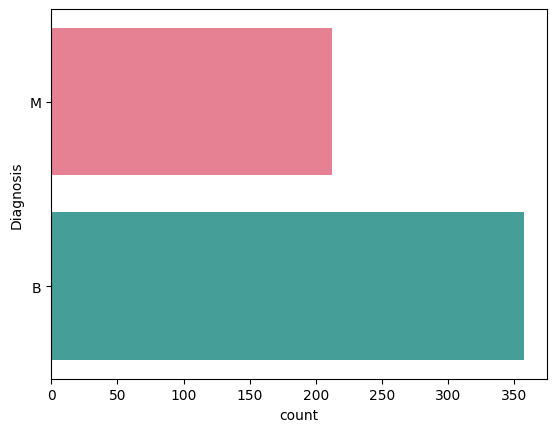

In [ ]:
sns.countplot(df['Diagnosis'], palette='husl')

## clean and prepare the data

In [ ]:
df.drop('ID',axis=1,inplace=True)
df.drop('Unnamed : 32',axis=1,inplace=True)

In [ ]:
df.head()

Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0         M    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1         M    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2         M    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3         M    11.42     20.38       77.58   386.1      0.14250       0.28390   
4         M    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  ...  radius3  texture3  perimeter3  \
0      0.3001          0.14710     0.2419  ...    25.38     17.33      184.60   
1      0.0869          0.07017     0.1812  ...    24.99     23.41      158.80   
2      0.1974          0.12790     0.2069  ...    23.57     25.53      152.50   
3      0.2414          0.10520     0.2597  ...    14.91     26.50       98.87   
4      0.1980          0.10430     0.1809  ...    22.54     16.67      152.20   

    area3  smoothness3  compactness3  concavity3  concave_points3  symmetry3  \
0  2019.0       0.1622        0.6656      0.7119           0.2654     0.4601   
1  1956.0       0.1238        0.1866      0.2416           0.1860     0.2750   
2  1709.0       0.1444        0.4245      0.4504           0.2430     0.3613   
3   567.7       0.2098        0.8663      0.6869           0.2575     0.6638   
4  1575.0       0.1374        0.2050      0.4000           0.1625     0.2364   

   fractal_dimension3  
0             0.11890  
1             0.08902  
2             0.08758  
3             0.17300  
4             0.07678  

[5 rows x 31 columns]

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M':1,'B':0})
df.head()

Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0          1    17.99     10.38      122.80  1001.0      0.11840   
1          1    20.57     17.77      132.90  1326.0      0.08474   
2          1    19.69     21.25      130.00  1203.0      0.10960   
3          1    11.42     20.38       77.58   386.1      0.14250   
4          1    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0       0.27760      0.3001          0.14710     0.2419  ...    25.38   
1       0.07864      0.0869          0.07017     0.1812  ...    24.99   
2       0.15990      0.1974          0.12790     0.2069  ...    23.57   
3       0.28390      0.2414          0.10520     0.2597  ...    14.91   
4       0.13280      0.1980          0.10430     0.1809  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  

[5 rows x 31 columns]

In [ ]:
df.isnull().sum()

Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
df.corr()

Diagnosis   radius1  texture1  perimeter1     area1  \
Diagnosis            1.000000  0.730029  0.415185    0.742636  0.708984   
radius1              0.730029  1.000000  0.323782    0.997855  0.987357   
texture1             0.415185  0.323782  1.000000    0.329533  0.321086   
perimeter1           0.742636  0.997855  0.329533    1.000000  0.986507   
area1                0.708984  0.987357  0.321086    0.986507  1.000000   
smoothness1          0.358560  0.170581 -0.023389    0.207278  0.177028   
compactness1         0.596534  0.506124  0.236702    0.556936  0.498502   
concavity1           0.696360  0.676764  0.302418    0.716136  0.685983   
concave_points1      0.776614  0.822529  0.293464    0.850977  0.823269   
symmetry1            0.330499  0.147741  0.071401    0.183027  0.151293   
fractal_dimension1  -0.012838 -0.311631 -0.076437   -0.261477 -0.283110   
radius2              0.567134  0.679090  0.275869    0.691765  0.732562   
texture2            -0.008303 -0.097317  0.386358   -0.086761 -0.066280   
perimeter2           0.556141  0.674172  0.281673    0.693135  0.726628   
area2                0.548236  0.735864  0.259845    0.744983  0.800086   
smoothness2         -0.067016 -0.222600  0.006614   -0.202694 -0.166777   
compactness2         0.292999  0.206000  0.191975    0.250744  0.212583   
concavity2           0.253730  0.194204  0.143293    0.228082  0.207660   
concave_points2      0.408042  0.376169  0.163851    0.407217  0.372320   
symmetry2           -0.006522 -0.104321  0.009127   -0.081629 -0.072497   
fractal_dimension2   0.077972 -0.042641  0.054458   -0.005523 -0.019887   
radius3              0.776454  0.969539  0.352573    0.969476  0.962746   
texture3             0.456903  0.297008  0.912045    0.303038  0.287489   
perimeter3           0.782914  0.965137  0.358040    0.970387  0.959120   
area3                0.733825  0.941082  0.343546    0.941550  0.959213   
smoothness3          0.421465  0.119616  0.077503    0.150549  0.123523   
compactness3         0.590998  0.413463  0.277830    0.455774  0.390410   
concavity3           0.659610  0.526911  0.301025    0.563879  0.512606   
concave_points3      0.793566  0.744214  0.295316    0.771241  0.722017   
symmetry3            0.416294  0.163953  0.105008    0.189115  0.143570   
fractal_dimension3   0.323872  0.007066  0.119205    0.051019  0.003738   

                    smoothness1  compactness1  concavity1  concave_points1  \
Diagnosis              0.358560      0.596534    0.696360         0.776614   
radius1                0.170581      0.506124    0.676764         0.822529   
texture1              -0.023389      0.236702    0.302418         0.293464   
perimeter1             0.207278      0.556936    0.716136         0.850977   
area1                  0.177028      0.498502    0.685983         0.823269   
smoothness1            1.000000      0.659123    0.521984         0.553695   
compactness1           0.659123      1.000000    0.883121         0.831135   
concavity1             0.521984      0.883121    1.000000         0.921391   
concave_points1        0.553695      0.831135    0.921391         1.000000   
symmetry1              0.557775      0.602641    0.500667         0.462497   
fractal_dimension1     0.584792      0.565369    0.336783         0.166917   
radius2                0.301467      0.497473    0.631925         0.698050   
texture2               0.068406      0.046205    0.076218         0.021480   
perimeter2             0.296092      0.548905    0.660391         0.710650   
area2                  0.246552      0.455653    0.617427         0.690299   
smoothness2            0.332375      0.135299    0.098564         0.027653   
compactness2           0.318943      0.738722    0.670279         0.490424   
concavity2             0.248396      0.570517    0.691270         0.439167   
concave_points2        0.380676      0.642262    0.683260         0.615634   
symmetry2              0.200774      0.229977    0.178009  

radius1 , perimeter1, area1 have a high correlation with malignant tumor

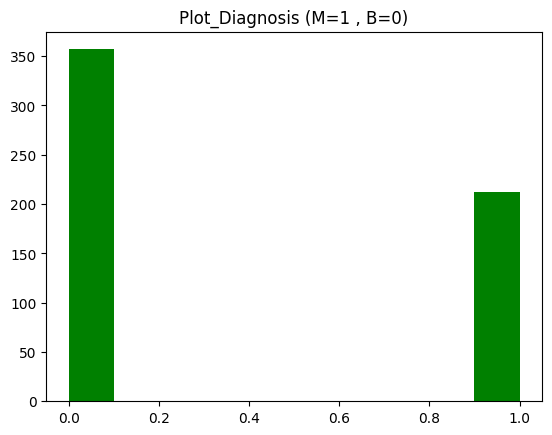

In [ ]:
plt.hist(df['Diagnosis'], color='g')
plt.title('Plot_Diagnosis (M=1 , B=0)')
plt.show()

<Axes: >

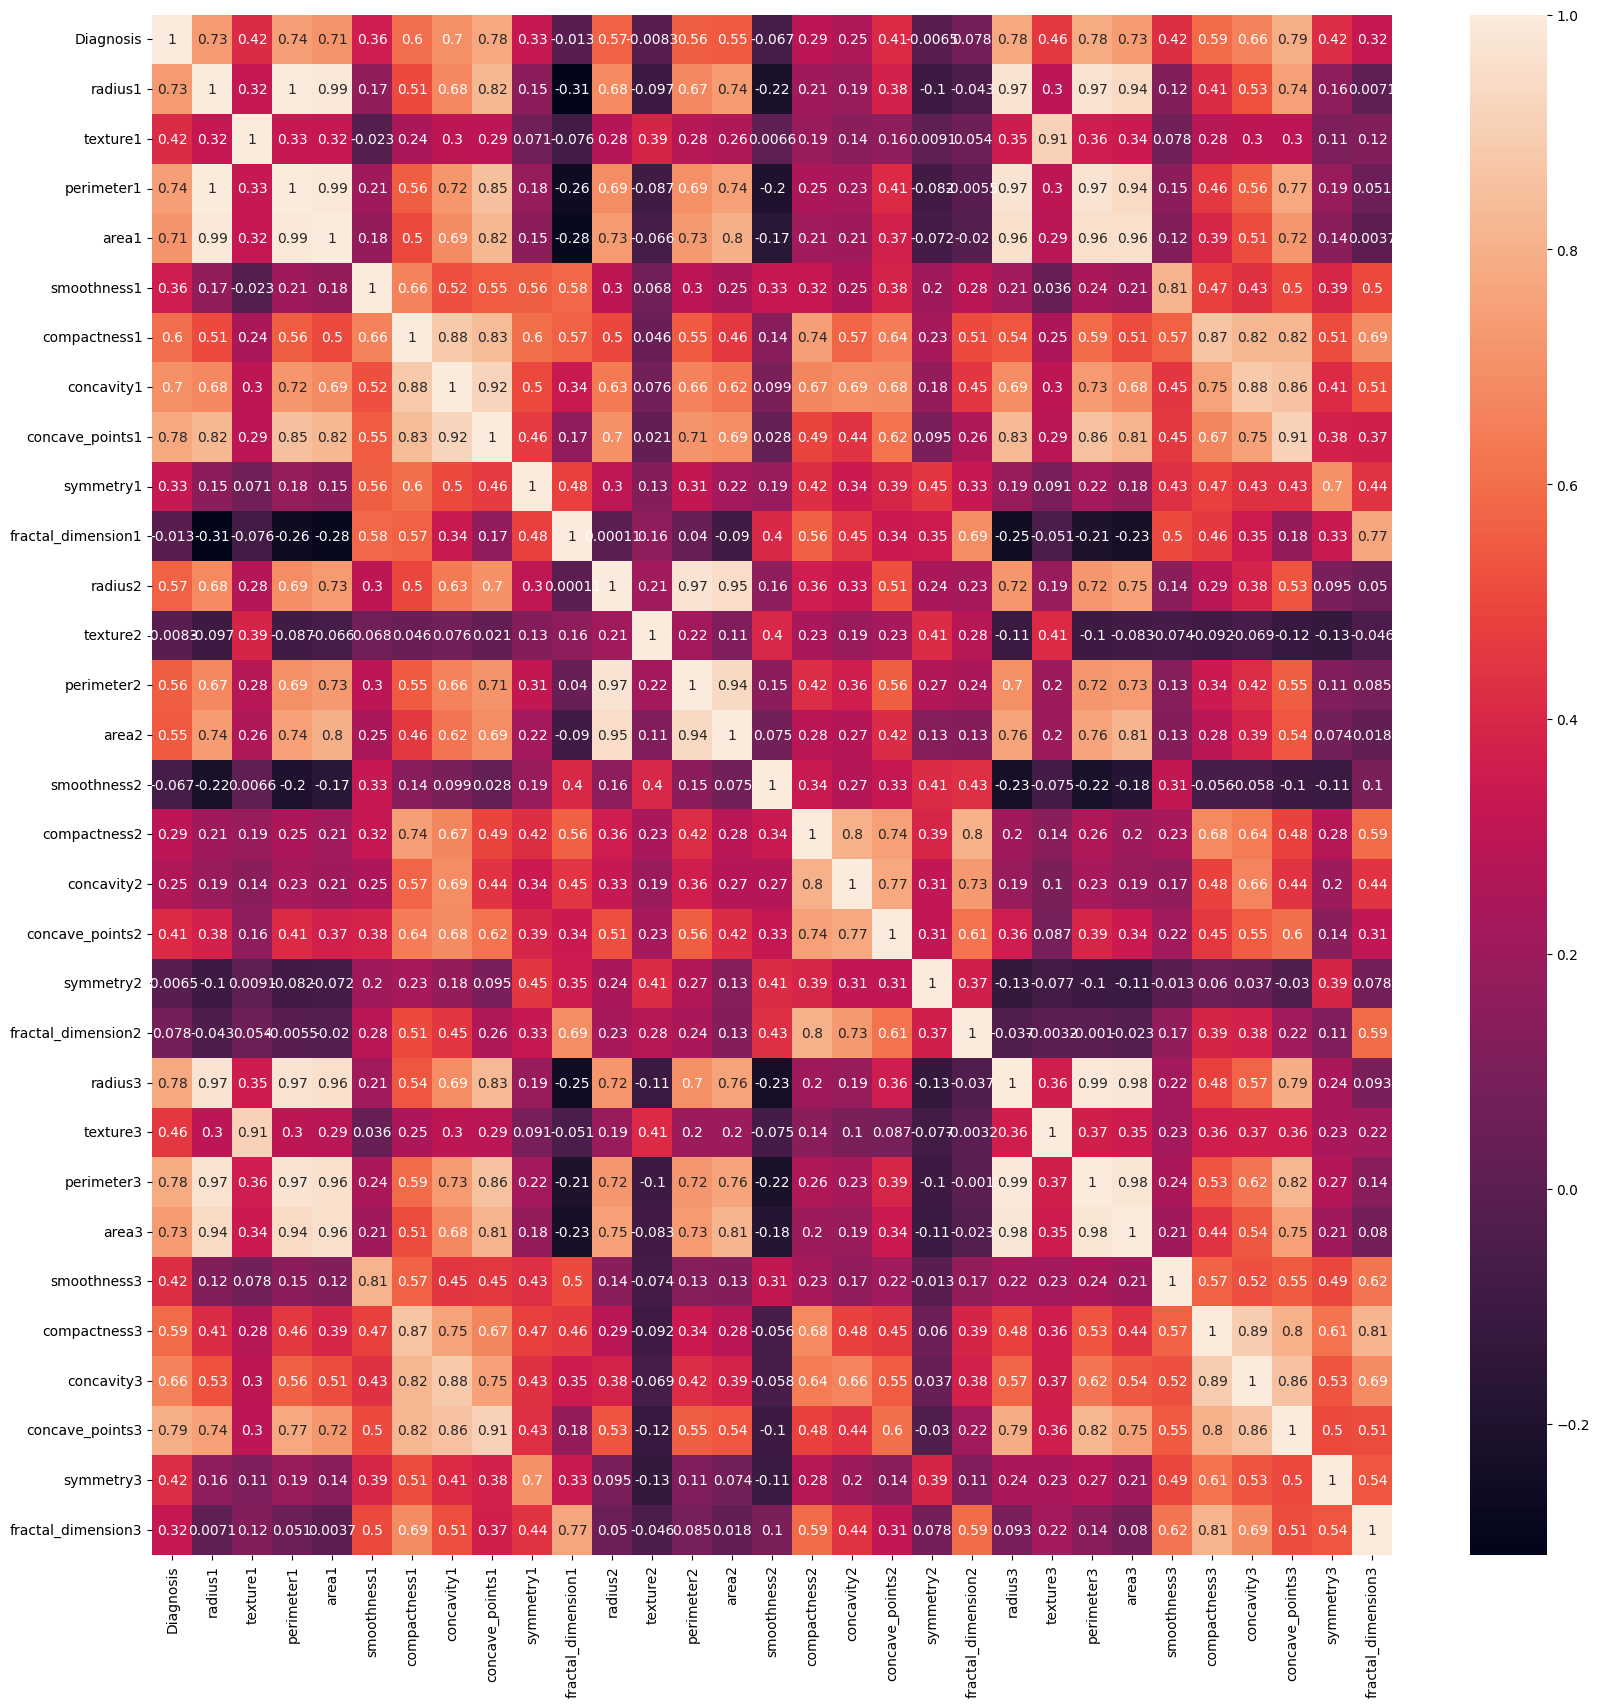

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

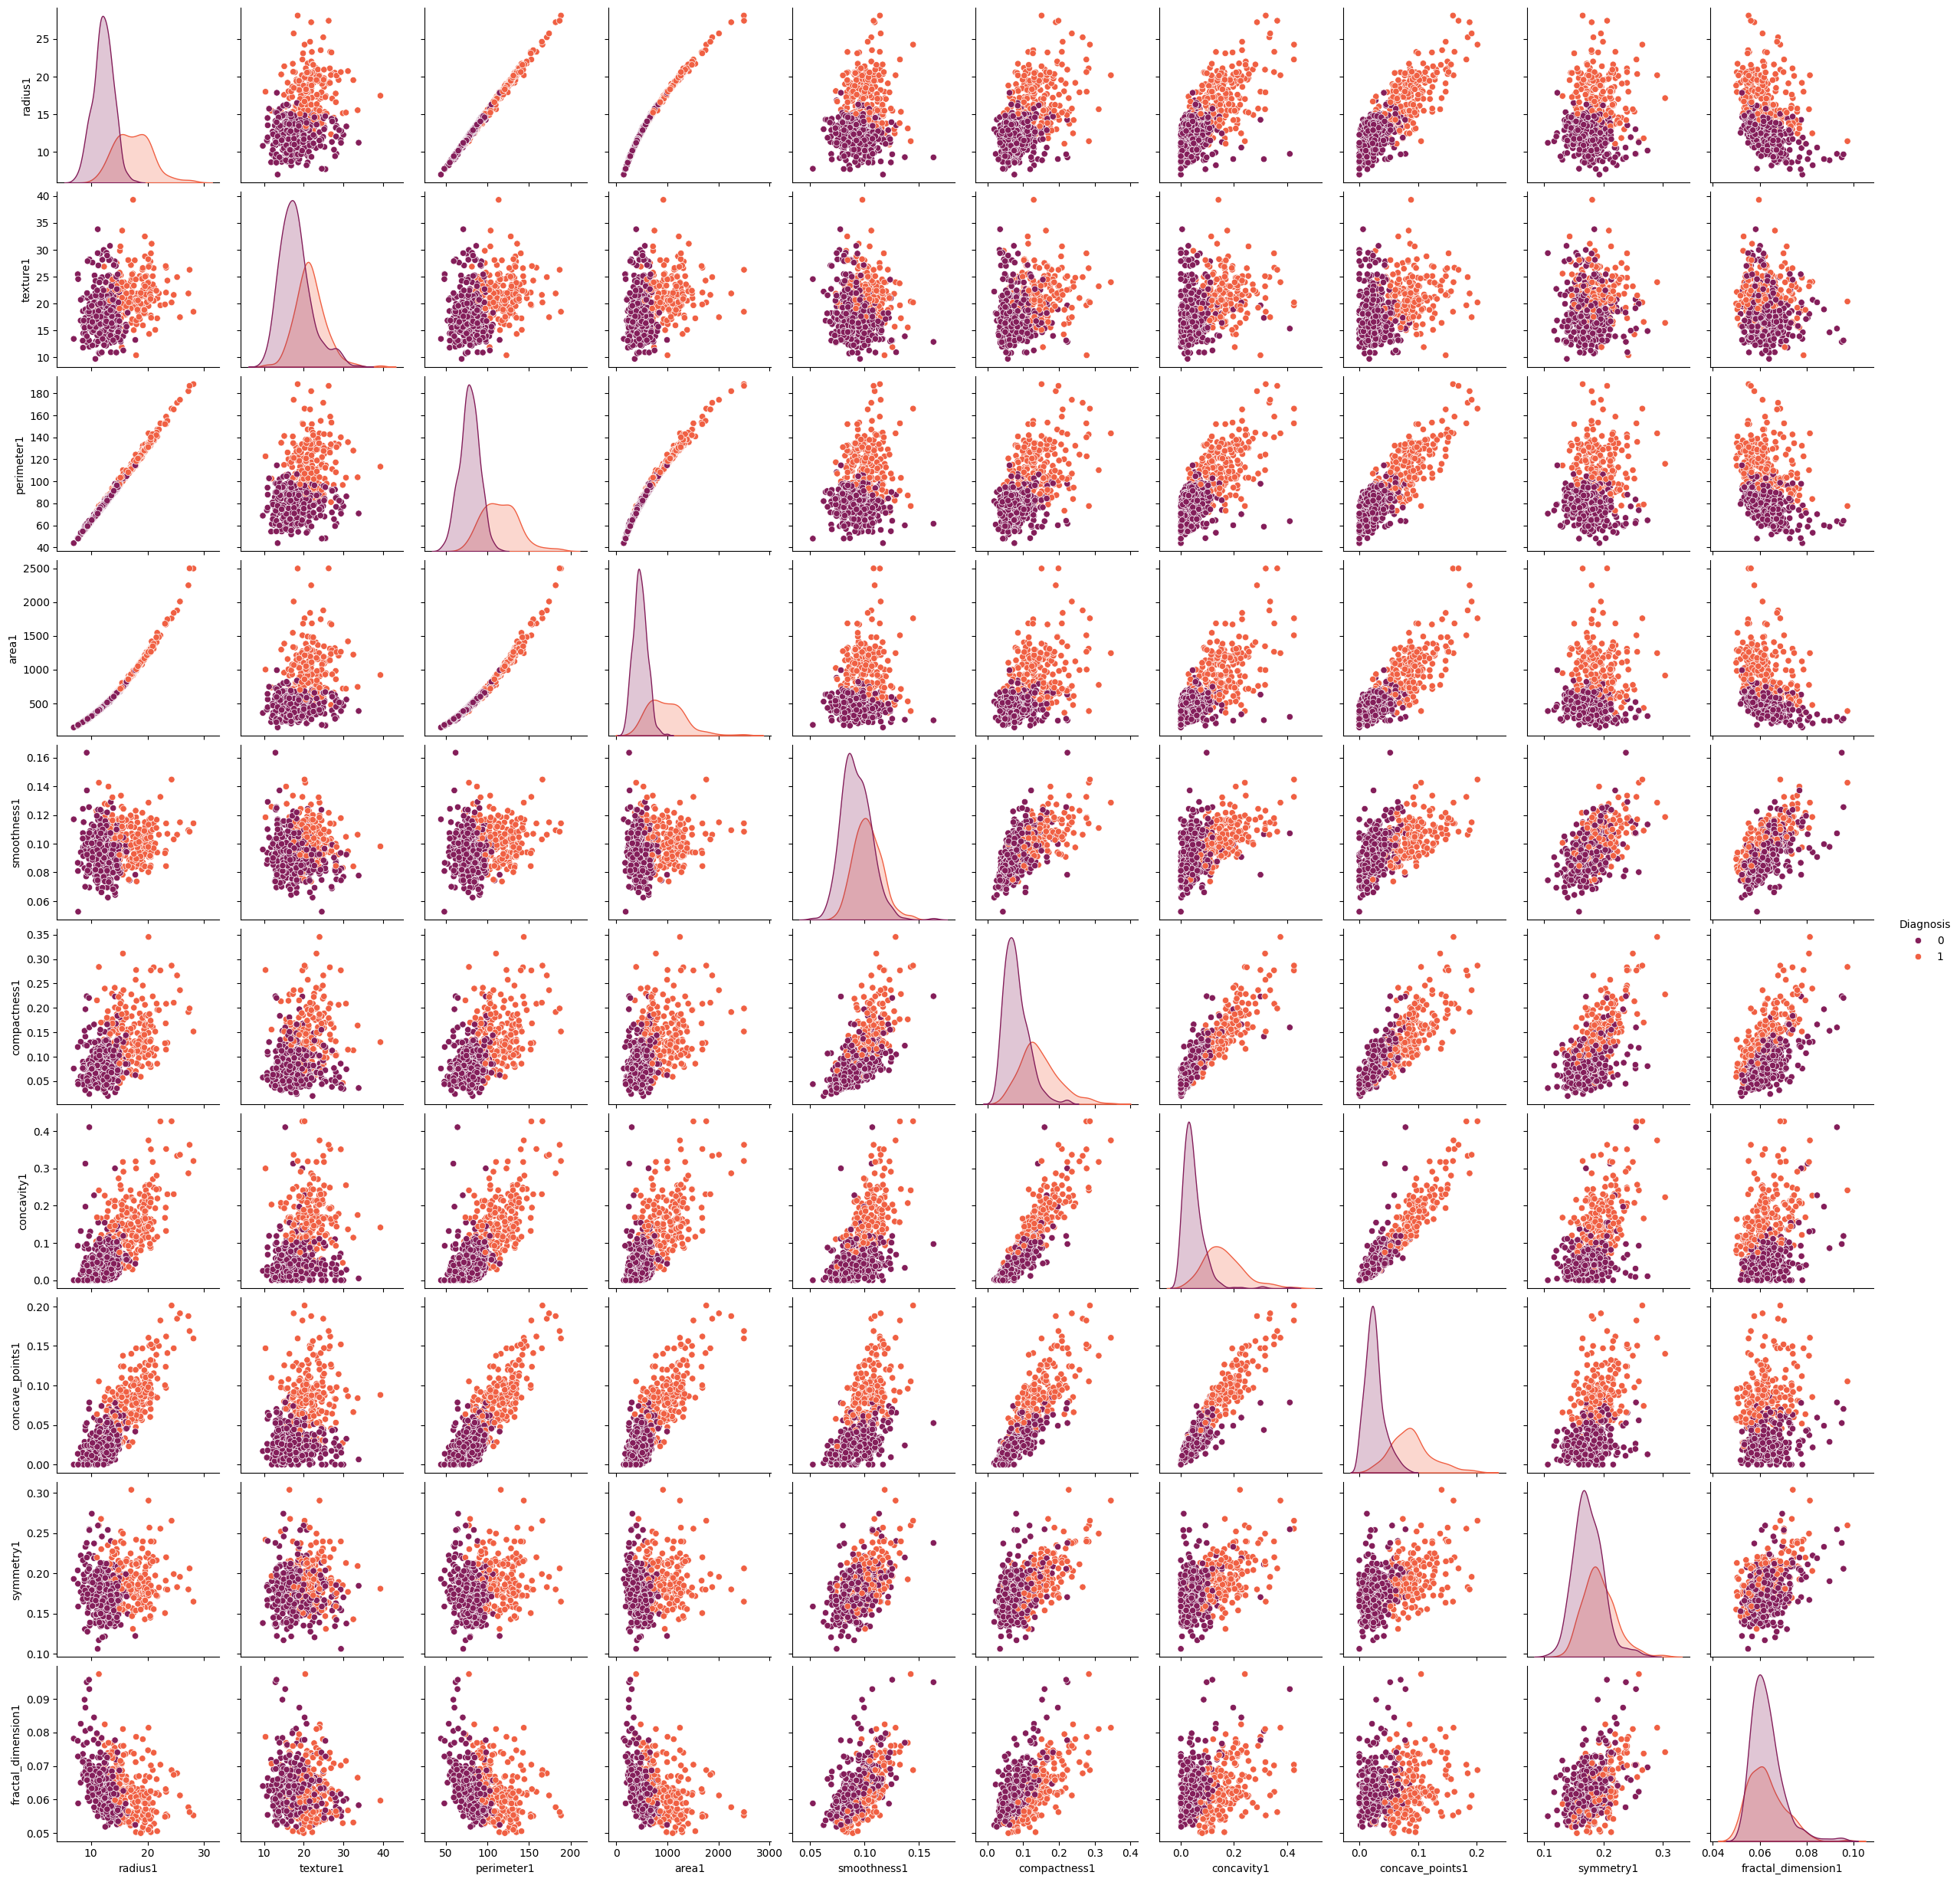

In [ ]:
# generate a scatter plot matrix with the "mean" columns
cols = ['Diagnosis',
        'radius1',
        'texture1',
        'perimeter1',
        'area1',
        'smoothness1',
        'compactness1',
        'concavity1',
        'concave_points1',
        'symmetry1',
        'fractal_dimension1']

sns.pairplot(data=df[cols], hue='Diagnosis', palette='rocket')

almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables. (they are highly linearly related)
Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

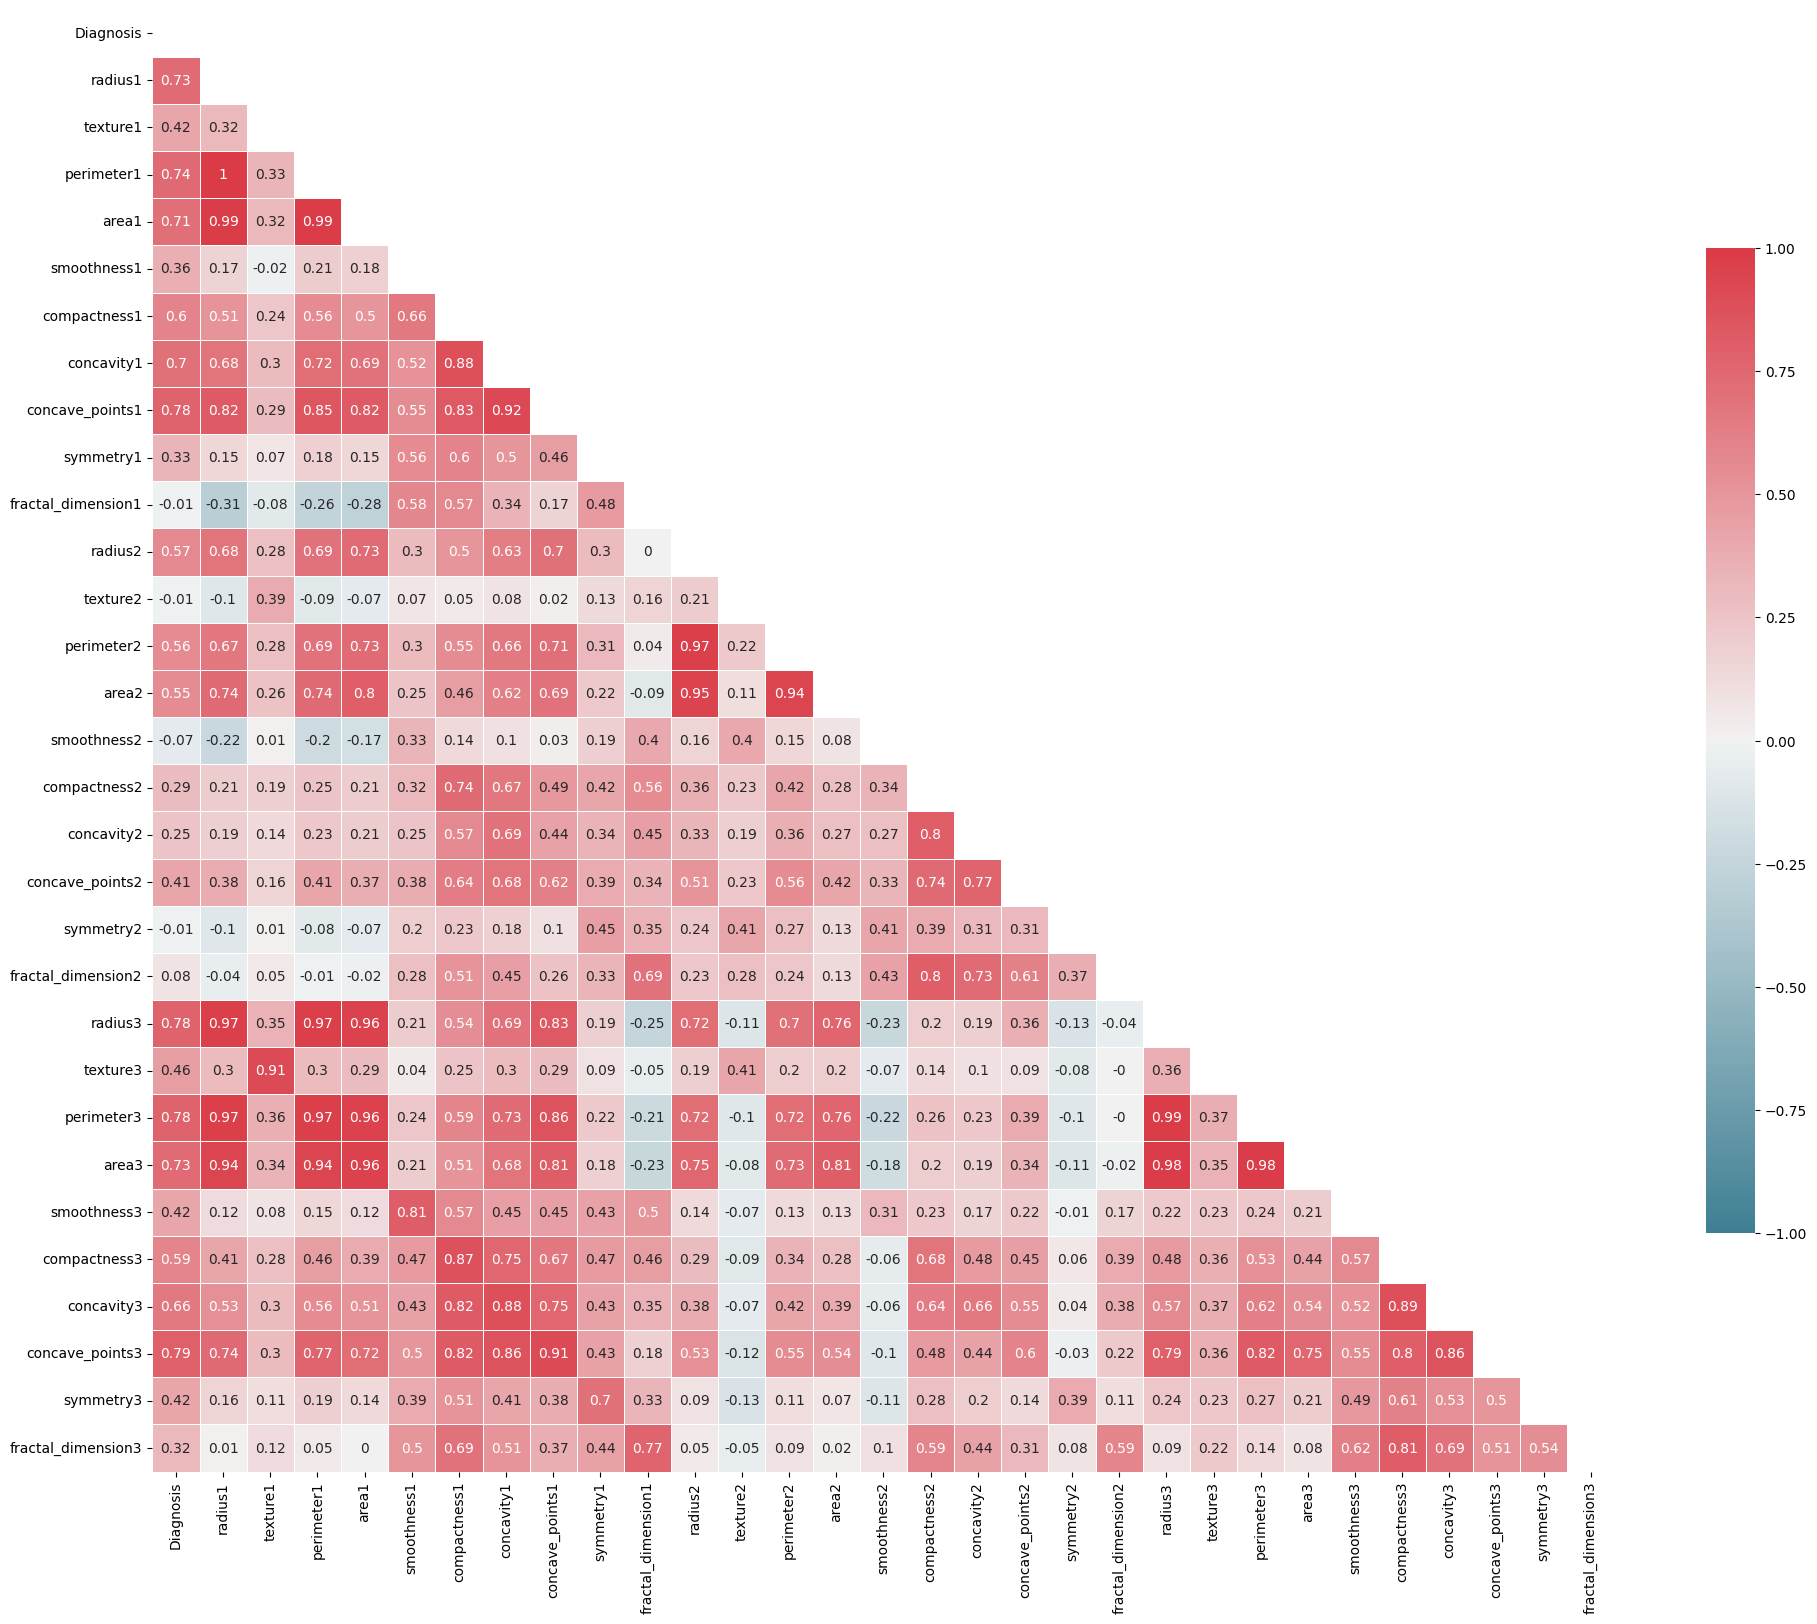

In [ ]:
# Generate and visualize the correlation matrix

corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

also there is multicollinearity between the attributes compactness, concavity, and concave points. So we can choose just ONE
out of these, I am going for Compactness.

In [ ]:
# first, drop all "worst" columns
cols = ['radius2',
        'texture2',
        'perimeter2',
        'area2',
        'smoothness2',
        'compactness2',
        'concavity2',
        'concave_points2',
        'symmetry2',
        'fractal_dimension2']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter1',
        'perimeter3',
        'area1',
        'area3']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity1',
        'concavity3',
        'concave_points1',
        'concave_points3']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['Diagnosis', 'radius1', 'texture1', 'smoothness1', 'compactness1',
       'symmetry1', 'fractal_dimension1', 'radius3', 'texture3', 'smoothness3',
       'compactness3', 'symmetry3', 'fractal_dimension3'],
      dtype='object')

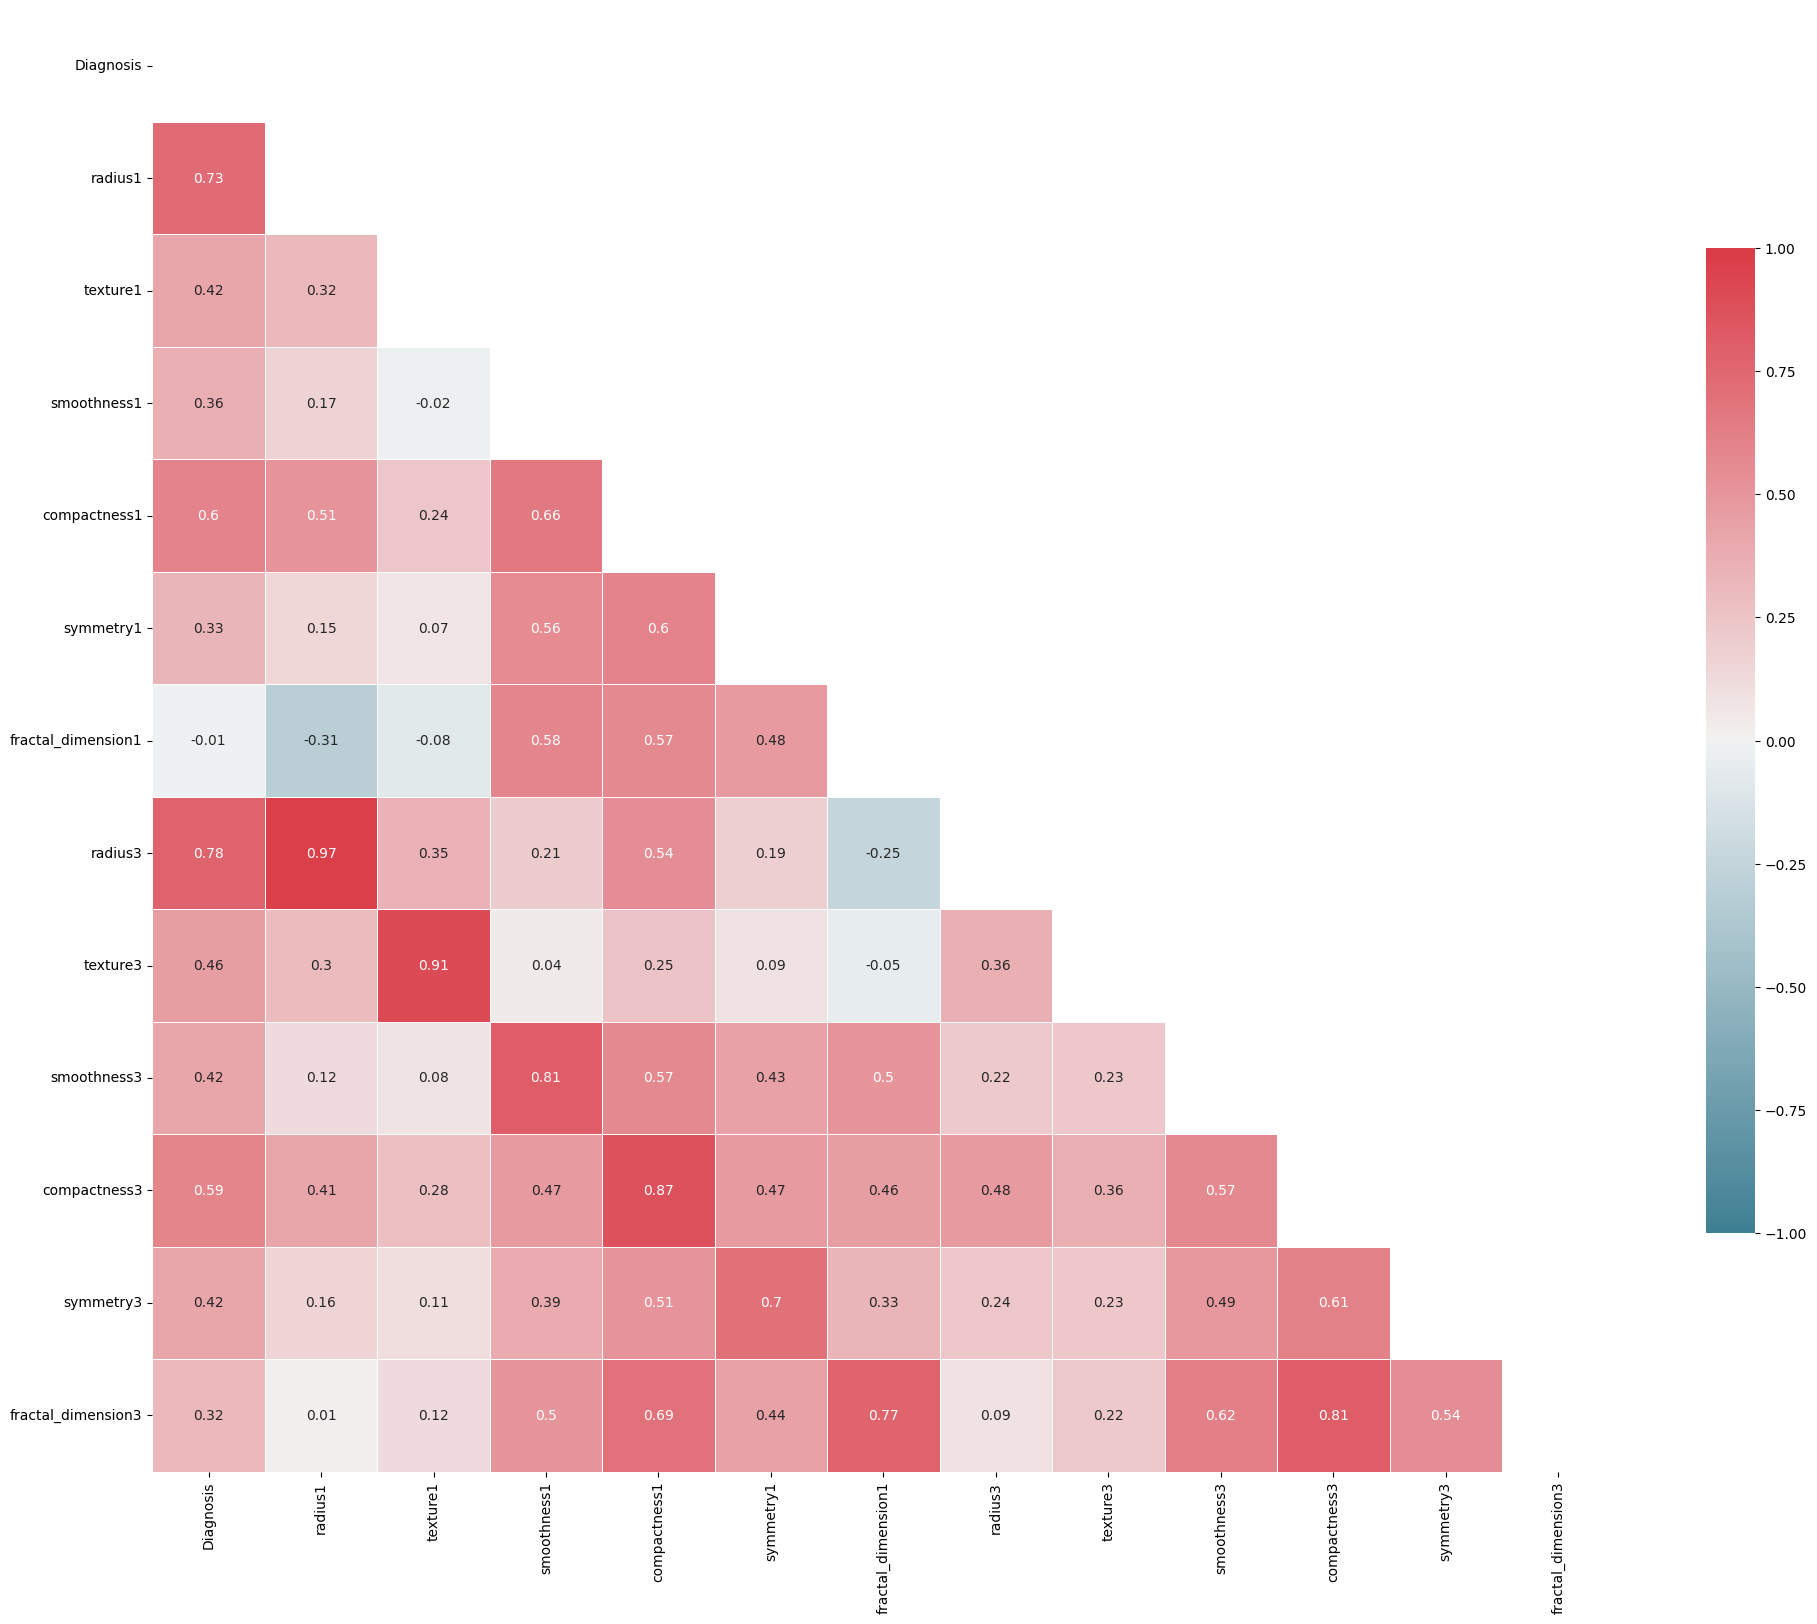

In [ ]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

## Building Model

In [ ]:
X=df.drop(['Diagnosis'],axis=1)
y = df['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

### Models and finding out the Best one

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[112,   3],
       [  1,  55]])

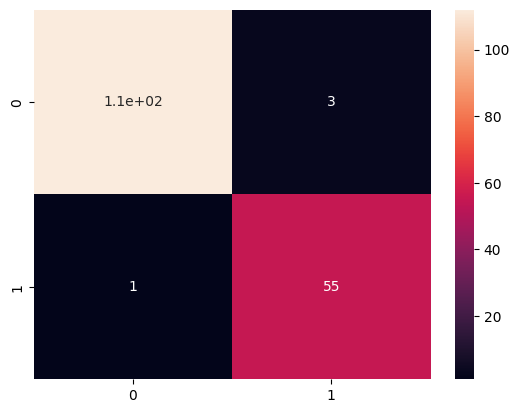

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9766081871345029


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prediction1)

0.9766081871345029

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [ ]:
cm2

array([[110,   5],
       [  9,  47]])

In [ ]:
accuracy_score(y_test,prediction2)

0.9181286549707602

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[111,   4],
       [  1,  55]])

In [ ]:
accuracy_score(y_test, prediction3)

0.9707602339181286

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.93      0.98      0.96        56

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
print(classification_report(y_test, prediction1))

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.90      0.84      0.87        56

    accuracy                           0.92       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



#### K Nearest Neighbor (K NN)
#### Support Vector Machine
#### Naive Bayes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:

# evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=40)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)



KNN: 0.937308 (0.030189)
NB: 0.927244 (0.036076)
SVM: 0.947115 (0.032873)


In [ ]:
# make predictions on validation datasets

SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.93      0.96      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171

[[111   4]
 [  2  54]]


##### We are getting the best accuracy with SVM which is 96.4%  , the model is predicting with 96% accuracy on our test data
